
# Introdução aos Modelos Lineares Generalizados (GLMs)
---
Os **Modelos Lineares Generalizados (GLMs)** são uma extensão dos modelos de regressão linear que permitem lidar com uma gama mais ampla de tipos de variáveis de resposta, indo além das variáveis contínuas normalmente associadas à regressão linear clássica. GLMs podem modelar variáveis que seguem distribuições diferentes da normal, como variáveis binárias, de contagem ou proporcionais, tornando-os muito flexíveis e amplamente utilizados em várias áreas de análise de dados.

## Componentes de um GLM
---
Um **GLM** é composto por três partes fundamentais:
1. **Distribuição da Família Exponencial**: A variável resposta $Y$ segue uma distribuição que pertence à família exponencial (normal, binomial, poisson, etc.).
2. **Função Linear**: Uma combinação linear das variáveis preditoras $X_1, X_2, ..., X_n$, que é representada como $X \beta = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n$.
3. **Função de Ligação**: Conecta a média esperada da variável de resposta com a combinação linear das variáveis preditoras. A função de ligação transforma a variável de resposta de maneira que possa ser modelada linearmente em relação aos preditores.

### Distribuição da Família Exponencial

Aqui estão algumas distribuições mais comuns na **família exponencial** (ou seja, distribuições que pertencem à família exponencial e que são frequentemente usadas em modelagem estatística):

1. **Distribuição Normal (Gaussiana)**:
   - A mais conhecida e usada para modelar variáveis contínuas que seguem uma distribuição simétrica em torno de uma média.
   - Parâmetros: média ($\mu$) e variância ($\sigma^2$).
   - Exemplo: Altura de pessoas, pontuações de testes.

2. **Distribuição Binomial**:
   - Usada para modelar o número de sucessos em $n$ ensaios independentes, onde cada ensaio tem a mesma probabilidade de sucesso $p$.
   - Parâmetros: número de ensaios ($n$) e probabilidade de sucesso ($p$).
   - Exemplo: Número de caras ao lançar uma moeda 10 vezes.

3. **Distribuição Poisson**:
   - Modela o número de eventos que ocorrem em um intervalo de tempo ou espaço, assumindo que os eventos ocorrem com uma taxa constante ($\lambda$) e independentemente uns dos outros.
   - Parâmetro: taxa ($\lambda$).
   - Exemplo: Número de chamadas recebidas em um call center por hora.

4. **Distribuição Exponencial**:
   - Usada para modelar o tempo entre eventos em um processo de Poisson.
   - Parâmetro: taxa ($\lambda$).
   - Exemplo: Tempo até a próxima chamada em um call center.

5. **Distribuição Gamma**:
   - Generaliza a distribuição exponencial para modelar o tempo até a ocorrência de $k$ eventos, com uma taxa constante $\lambda$.
   - Parâmetros: forma ($k$) e taxa ($\lambda$).
   - Exemplo: Tempo até que $k$ chamadas sejam recebidas.

6. **Distribuição Bernoulli**:
   - Modelo mais simples da distribuição binomial, onde há apenas um ensaio e o resultado é uma única variável binária (sucesso ou fracasso).
   - Parâmetro: probabilidade de sucesso ($p$).
   - Exemplo: Jogar uma moeda uma vez.

7. **Distribuição Beta**:
   - Usada para modelar distribuições de probabilidades em um intervalo [0,1]. Ela é útil para modelar incertezas sobre a probabilidade de sucesso $p$.
   - Parâmetros: dois parâmetros de forma ($\alpha$) e ($\beta$).
   - Exemplo: Distribuição a priori de uma probabilidade em estatísticas bayesianas.

8. **Distribuição Multinomial**:
   - Generaliza a distribuição binomial para mais de duas categorias. Modela a probabilidade de observar um conjunto de contagens em $k$ categorias em $n$ ensaios.
   - Parâmetros: número de ensaios ($n$) e vetor de probabilidades ($p_1, p_2, ..., p_k$).
   - Exemplo: Jogar um dado 10 vezes e contar as frequências de cada face.




In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import numpy as np
from utils import get_summary
from sklearn.model_selection import train_test_split
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from scipy.stats import norm, binom, poisson, expon, gamma, bernoulli, beta
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

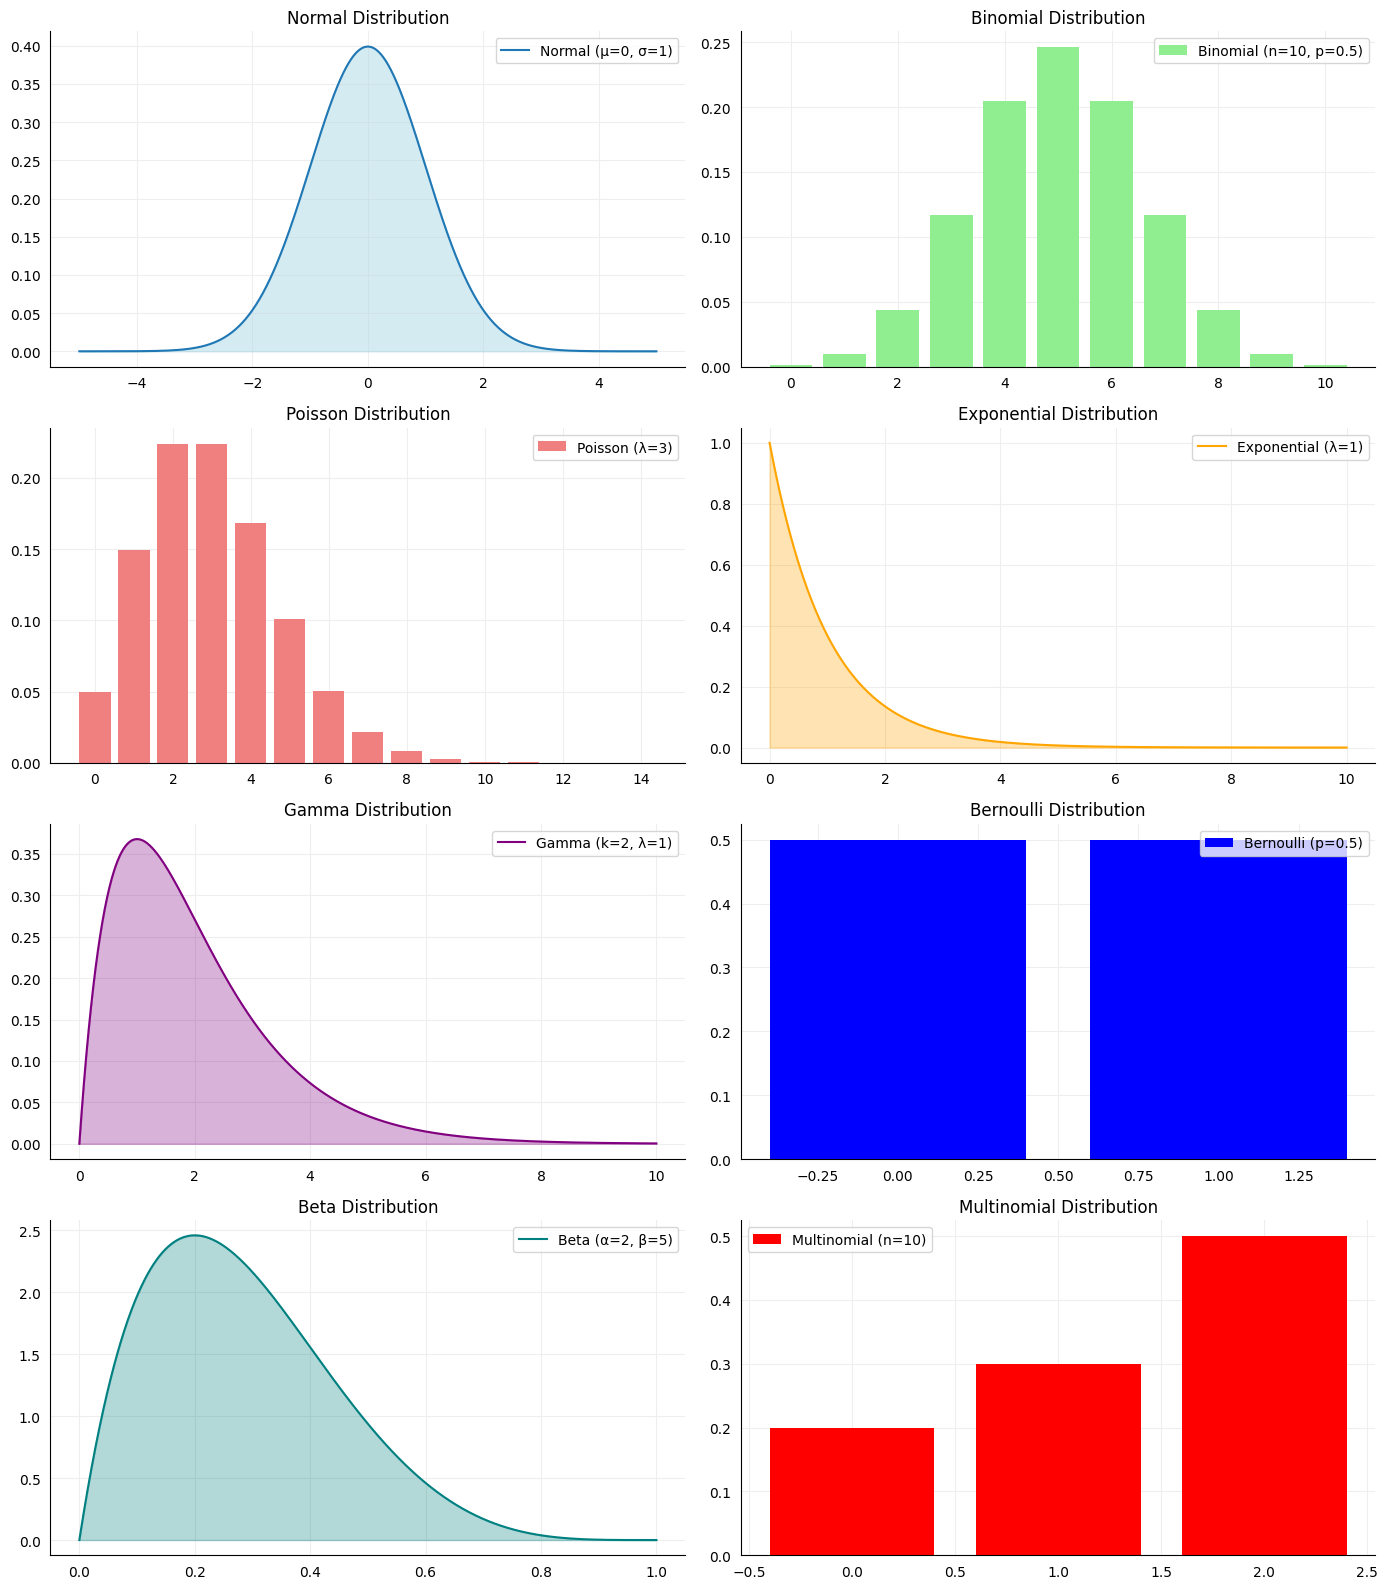

In [258]:


def style_ax(ax):
    # Axis styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(True)
    # ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(True, color='#EEEEEE')


# Configurar a figura e subplots
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
fig.subplots_adjust(hspace=0.4)

# 1. Normal Distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1)
axs[0, 0].plot(x, y, label='Normal (µ=0, σ=1)')
axs[0, 0].fill_between(x, y, color="lightblue", alpha=0.5)
axs[0, 0].set_title('Normal Distribution')
axs[0, 0].legend()

# 2. Binomial Distribution
n, p = 10, 0.5
x_binom = np.arange(0, n+1)
y_binom = binom.pmf(x_binom, n, p)
axs[0, 1].bar(x_binom, y_binom, color='lightgreen', label=f'Binomial (n={n}, p={p})')
axs[0, 1].set_title('Binomial Distribution')
axs[0, 1].legend()

# 3. Poisson Distribution
lambda_poisson = 3
x_poisson = np.arange(0, 15)
y_poisson = poisson.pmf(x_poisson, lambda_poisson)
axs[1, 0].bar(x_poisson, y_poisson, color='lightcoral', label=f'Poisson (λ={lambda_poisson})')
axs[1, 0].set_title('Poisson Distribution')
axs[1, 0].legend()

# 4. Exponential Distribution
x_exp = np.linspace(0, 10, 1000)
y_exp = expon.pdf(x_exp, scale=1)
axs[1, 1].plot(x_exp, y_exp, label='Exponential (λ=1)', color='orange')
axs[1, 1].fill_between(x_exp, y_exp, color="orange", alpha=0.3)
axs[1, 1].set_title('Exponential Distribution')
axs[1, 1].legend()

# 5. Gamma Distribution
x_gamma = np.linspace(0, 10, 1000)
y_gamma = gamma.pdf(x_gamma, a=2)
axs[2, 0].plot(x_gamma, y_gamma, label='Gamma (k=2, λ=1)', color='purple')
axs[2, 0].fill_between(x_gamma, y_gamma, color="purple", alpha=0.3)
axs[2, 0].set_title('Gamma Distribution')
axs[2, 0].legend()

# 6. Bernoulli Distribution
p_bernoulli = 0.5
x_bernoulli = [0, 1]
y_bernoulli = bernoulli.pmf(x_bernoulli, p_bernoulli)
axs[2, 1].bar(x_bernoulli, y_bernoulli, color='blue', label=f'Bernoulli (p={p_bernoulli})')
axs[2, 1].set_title('Bernoulli Distribution')
axs[2, 1].legend()

# 7. Beta Distribution
a, b = 2, 5
x_beta = np.linspace(0, 1, 1000)
y_beta = beta.pdf(x_beta, a, b)
axs[3, 0].plot(x_beta, y_beta, label=f'Beta (α={a}, β={b})', color='teal')
axs[3, 0].fill_between(x_beta, y_beta, color="teal", alpha=0.3)
axs[3, 0].set_title('Beta Distribution')
axs[3, 0].legend()

# 8. Multinomial Distribution (simplified as bar plot)
n_multinomial = 10
p_multinomial = [0.2, 0.3, 0.5]
x_multinomial = np.arange(0, len(p_multinomial))
axs[3, 1].bar(x_multinomial, p_multinomial, color='red', label=f'Multinomial (n={n_multinomial})')
axs[3, 1].set_title('Multinomial Distribution')
axs[3, 1].legend()

#  apply the style in all axes
for ax in axs.flat:
    style_ax(ax)
# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

### Função de Ligação

A **função de ligação** desempenha um papel central nos GLMs, pois transforma a variável de resposta para que ela se ajuste ao modelo linear. Diferentes funções de ligação podem ser usadas dependendo da natureza da variável resposta e da distribuição associada a ela. Alguns exemplos comuns de funções de ligação incluem:
- **Identidade**: Usada em regressão linear, onde a resposta é contínua e segue uma distribuição normal.
- **Logarítmica**: Usada em regressão de Poisson para modelar contagens, onde a variável resposta segue uma distribuição de Poisson.
- **Logit**: Usada em regressão logística para modelar uma variável binária.

Essas funções de ligação permitem que os GLMs tratem de diferentes tipos de problemas de modelagem, ajustando variáveis de resposta que não são necessariamente contínuas e normalmente distribuídas.


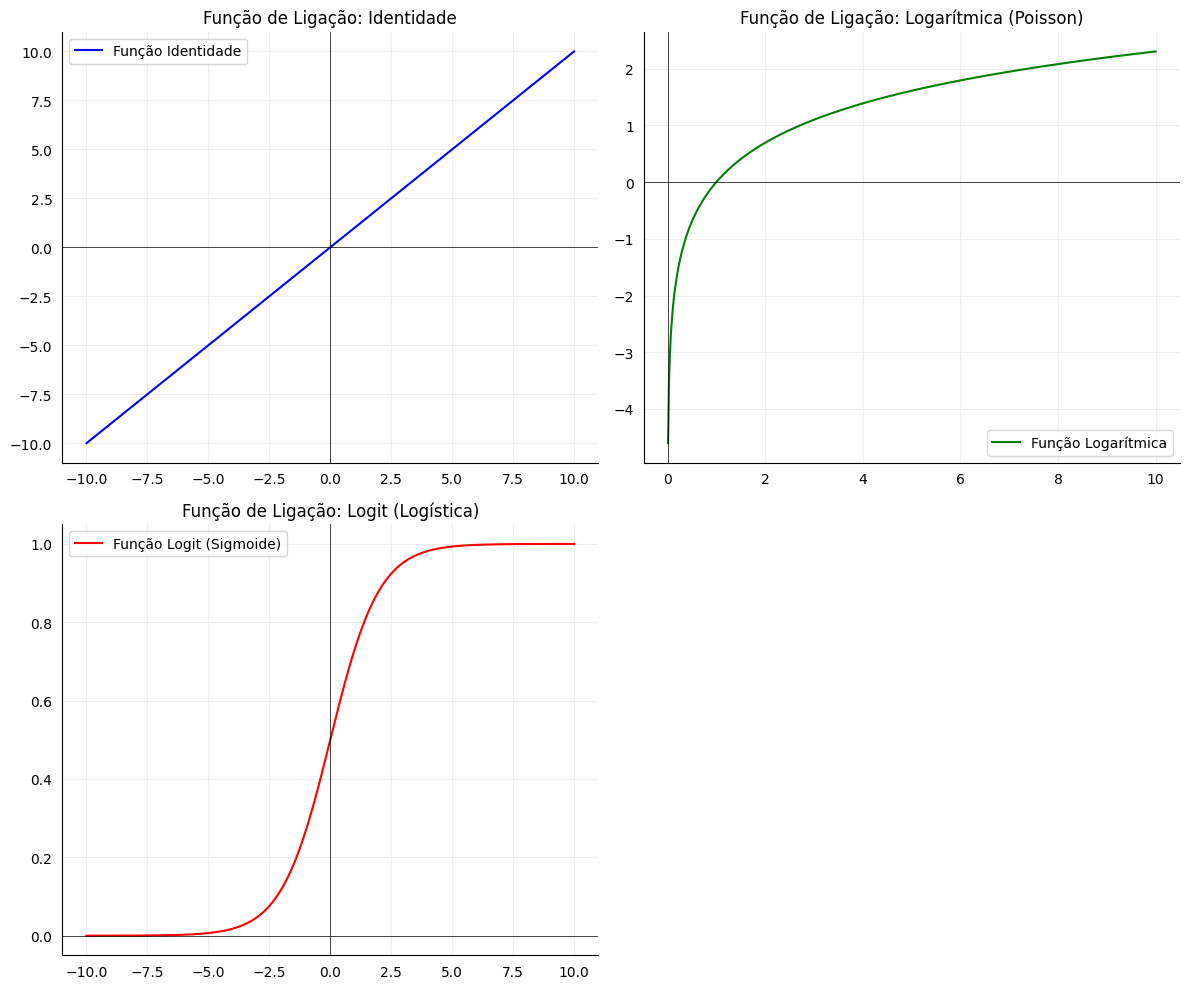

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Para a função sigmoide (logit)

# Definir o intervalo de valores da variável preditora
x = np.linspace(-10, 10, 1000)

# Função Identidade (usada na Regressão Linear)
def identity(x):
    return x

# Função Logarítmica (usada na Regressão de Poisson)
def log_link(x):
    # Para evitar log(0), adicionamos uma pequena constante
    return np.log(x + 1e-5)

# Função Logit (usada na Regressão Logística)
def logit(x):
    return expit(x)  # Função sigmoide = 1 / (1 + exp(-x))

# Ajustando o layout para ter 4 gráficos (2x2), com o último vazio
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Plot Função Identidade
axs[0, 0].plot(x, identity(x), label='Função Identidade', color='blue')
axs[0, 0].set_title('Função de Ligação: Identidade')
axs[0, 0].axhline(0, color='black', linewidth=0.5)
axs[0, 0].axvline(0, color='black', linewidth=0.5)
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Plot Função Logarítmica
axs[0, 1].plot(x[x >= 0], log_link(x[x >= 0]), label='Função Logarítmica', color='green')
axs[0, 1].set_title('Função de Ligação: Logarítmica (Poisson)')
axs[0, 1].axhline(0, color='black', linewidth=0.5)
axs[0, 1].axvline(0, color='black', linewidth=0.5)
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Plot Função Logit
axs[1, 0].plot(x, logit(x), label='Função Logit (Sigmoide)', color='red')
axs[1, 0].set_title('Função de Ligação: Logit (Logística)')
axs[1, 0].axhline(0, color='black', linewidth=0.5)
axs[1, 0].axvline(0, color='black', linewidth=0.5)
axs[1, 0].legend()
axs[1, 0].grid(True)

# O último gráfico ficará vazio
axs[1, 1].axis('off')  # Desabilitar o gráfico



# Aplicar estilo aos eixos
for ax in axs.flat:
    style_ax(ax)
# Ajustar layout
plt.tight_layout()
plt.show()

## Tipos Comuns de GLMs
---

- **Regressão Linear**: Utiliza uma função de ligação identidade e é apropriada quando a variável resposta é contínua e segue uma distribuição normal.
- **Regressão de Poisson**: Usa uma função de ligação logarítmica para modelar contagens, como o número de eventos que ocorrem em um intervalo de tempo.
- **Regressão Logística**: Utiliza a função de ligação **logit** e é usada quando a variável resposta é binária (por exemplo, sucesso/falha ou sim/não).

Agora que compreendemos o conceito de Modelos Lineares Generalizados e as várias possibilidades que eles oferecem, vamos nos aprofundar em um caso específico de GLM: a **Regressão Logística**, que é usada para prever a probabilidade de eventos binários.


# Regressão Logística
---

A regressão logística é um método estatístico amplamente utilizado para modelar a probabilidade de um evento binário, ou seja, uma variável de resposta que pode assumir dois valores, como **"sim/não", "1/0"**, ou **"verdadeiro/falso"**. 

Embora compartilhe características com a regressão linear, a regressão logística é usada quando o objetivo é prever a probabilidade de ocorrência de um determinado evento.

## 1. **Fundamentos da Regressão Logística**

A regressão logística prevê a probabilidade de uma variável resposta $Y$ assumir o valor 1 (evento) dado um conjunto de variáveis preditoras $X_1, X_2, ..., X_n$. Ao contrário da regressão linear, que pode produzir valores contínuos, a regressão logística trabalha com probabilidades entre 0 e 1.

### Equação da Regressão Logística:

A fórmula da regressão logística é:

\begin{equation*}
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
\end{equation*}

Ou, de maneira mais compacta:

\begin{equation*}
P(Y=1|X) = \frac{1}{1 + e^{-(X \beta)}}
\end{equation*}

Onde:
- $P(Y=1|X)$ é a probabilidade de o evento ocorrer.
- $X_1, X_2, ..., X_n$ são as variáveis preditoras.
- $\beta_0$ é o intercepto e $\beta_1, \beta_2, ..., \beta_n$ são os coeficientes da regressão.
- $e$ é a base do logaritmo natural.

### Função Logit:

A regressão logística se baseia na função logit, que transforma as probabilidades em uma escala logarítmica:

\begin{equation*}
\log\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
\end{equation*}

Aqui, a razão $\frac{P(Y=1)}{1 - P(Y=1)}$ é chamada de **odds** ou razão de chances.

## 2. **Interpretação dos Coeficientes**

- **Intercepto ($\beta_0$)**: O valor de $\beta_0$ representa o log-odds da variável resposta quando todas as variáveis preditoras são iguais a 0.
- **Coeficientes ($\beta_1, \beta_2, ..., \beta_n$)**: Cada coeficiente indica a variação do log-odds para um aumento de uma unidade na variável preditora correspondente. Em termos de probabilidade, um coeficiente positivo aumenta a probabilidade do evento ocorrer, e um coeficiente negativo a reduz.

## 3. **Função Sigmoide**

A regressão logística usa a função sigmoide para transformar o resultado da regressão linear em uma probabilidade entre 0 e 1. A fórmula da função sigmoide é:

\begin{equation*}
S(z) = \frac{1}{1 + e^{-z}}
\end{equation*}

Ela transforma um valor contínuo $z$ (que pode ser qualquer valor real) em uma probabilidade entre 0 e 1.

## 4. **Assumptions da Regressão Logística**

Embora a regressão logística seja bastante flexível, ela possui alguns pressupostos importantes:

- **Independência das Observações**: As observações devem ser independentes umas das outras.
- **Linearidade no Logit**: A relação entre as variáveis preditoras e o logit (log-odds) deve ser linear.
- **Ausência de Colinearidade**: As variáveis preditoras não devem ser altamente correlacionadas entre si (multicolinearidade).

## 5. **Avaliação do Modelo**

### a. **Acurácia**

Uma métrica básica usada para avaliar o modelo de regressão logística é a acurácia, que é a proporção de previsões corretas (tanto positivas quanto negativas) entre todas as previsões feitas:

\begin{equation*}
\text{Acurácia} = \frac{\text{Previsões Corretas}}{\text{Total de Observações}}
\end{equation*}

### b. **Matriz de Confusão**

Uma matriz de confusão é uma tabela que mostra os verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN). Ela fornece uma visão mais detalhada sobre a performance do modelo.

### c. **Curva ROC e AUC**

A **Curva ROC** (Receiver Operating Characteristic) é um gráfico que mostra a taxa de verdadeiros positivos contra a taxa de falsos positivos para diferentes valores de corte de probabilidade. O **AUC** (Area Under the Curve) mede o desempenho geral do modelo. Quanto mais próximo de 1, melhor o desempenho do modelo.

### d. **Pseudo-R²**

O **Pseudo-R²** é uma métrica adaptada para regressão logística que mede a "bondade de ajuste" do modelo, similar ao R² da regressão linear.

## 6. **Vantagens da Regressão Logística**

- **Simples e Eficaz**: Fácil de implementar e interpretar.
- **Probabilidades como Saída**: A regressão logística não apenas faz previsões binárias, mas também fornece probabilidades para cada classe.
- **Robustez**: Pode lidar com variáveis categóricas e numéricas e, com a devida preparação, lidar com valores faltantes.

## 7. **Limitações da Regressão Logística**

- **Relação Linear entre Logit e Variáveis Preditivas**: O modelo assume que existe uma relação linear entre o log-odds e as variáveis preditoras, o que pode não ser verdadeiro para alguns dados.
- **Multicolinearidade**: A regressão logística é sensível a multicolinearidade, onde variáveis preditoras são altamente correlacionadas.
- **Não Adequado para Problemas Multiclasse**: A regressão logística binária só lida com duas classes. Para problemas de múltiplas classes, deve-se usar a **regressão logística multinomial**.


---

## 9. **Aplicações da Regressão Logística**

- **Modelos de Crédito**: Usada para prever inadimplência de crédito.
- **Classificação Médica**: Usada para prever a presença de uma doença com base em sintomas ou exames.
- **Marketing**: Usada para prever se um cliente responderá positivamente a uma campanha de marketing.
- **Processamento de Linguagem Natural (NLP)**: Classificação de textos, como análises de sentimentos.

---

A regressão logística é uma técnica poderosa e versátil, adequada para resolver uma ampla gama de problemas de classificação binária e fornecer previsões probabilísticas, tornando-a uma ferramenta essencial em ciência de dados e aprendizado de máquina.



### Simulação:
- 4 variáveis categóricas (binárias e com múltiplas classes).
- 3 variáveis contínuas.
- Variável dependente (binária) que segue uma lógica de regressão logística com essas variáveis.


In [260]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import expit  # Sigmoid function

# Definir o número de amostras
n_samples = 20000

# 1. Simular 4 variáveis categóricas
# 3 variáveis com 4 classes (0, 1, 2, 3)
cat1 = np.random.choice([0, 1, 2, 3], size=n_samples)
cat2 = np.random.choice([0, 1, 2, 3], size=n_samples)
cat3 = np.random.choice([0, 1, 2, 3], size=n_samples)
# 1 variável com 6 classes (0, 1, 2, 3, 4, 5)
cat4 = np.random.choice([0, 1, 2, 3, 4, 5], size=n_samples)

# 4 variáveis binárias
bin1 = np.random.binomial(1, 0.5, size=n_samples)
bin2 = np.random.binomial(1, 0.5, size=n_samples)
bin3 = np.random.binomial(1, 0.5, size=n_samples)
bin4 = np.random.binomial(1, 0.5, size=n_samples)

# 2. Simular 3 variáveis contínuas
cont1 = np.random.normal(loc=0, scale=1, size=n_samples)
cont2 = np.random.normal(loc=5, scale=2, size=n_samples)
cont3 = np.random.uniform(0, 10, size=n_samples)

# 3. Codificar variáveis categóricas usando One-Hot Encoding
encoder = OneHotEncoder(drop='first')
categorical_data = encoder.fit_transform(np.column_stack((cat1, cat2, cat3, cat4)))

# 4. Simular os coeficientes para as variáveis no modelo logístico
# Inclui coeficientes para as variáveis contínuas e os dummies criados
n_features = 11 
coef = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Coeficientes
intercept = -0.5  # Intercepto

# 5. Calcular a combinação linear das variáveis explicativas
X = np.column_stack((cat1, cat2, cat3, cat4, cont1, cont2, cont3, bin1, bin2, bin3, bin4))
linear_combination = intercept + np.dot(X, coef)

df_coefs = pd.DataFrame(
    {
        'features': ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4'],
        'coef': coef
    }
)

# 6. Aplicar a função sigmoide para gerar probabilidades
probabilities = expit(linear_combination)
noises = np.random.normal(0, 0.035, size=n_samples)  # Ruído aleatório
probabilities = probabilities + noises  # Adicionar ruído

# 7. Gerar a variável binária dependente com base nas probabilidades se y>0.9 então 1, senão 0
y = (probabilities > 0.9).astype(int)


# Criar um DataFrame com as variáveis simuladas e a variável dependente
df = pd.DataFrame({
    'bin1': bin1,
    'bin2': bin2,
    'bin3': bin3,
    'bin4': bin4,
    'cat1': cat1,
    'cat2': cat2,
    'cat3': cat3,
    'cat4': cat4,
    'cont1': cont1,
    'cont2': cont2,
    'cont3': cont3,
    'y': y
})

# Exibir as primeiras linhas do DataFrame
get_summary(df)

Number of rows: 20000


,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
bin1,int64,0,0.0,0,50.19,2,"[1, 0]"
bin2,int64,0,0.0,1,50.01,2,"[0, 1]"
bin3,int64,0,0.0,1,50.08,2,"[1, 0]"
bin4,int64,0,0.0,0,50.135,2,"[0, 1]"
cat1,int64,0,0.0,3,25.37,4,"[1, 2, 0, 3]"
cat2,int64,0,0.0,3,25.39,4,"[2, 3, 1, 0]"
cat3,int64,0,0.0,2,25.05,4,"[3, 0, 2, 1]"
cat4,int64,0,0.0,0,16.775,6,"[3, 2, 1, 4, 0, 5]"
cont1,float64,0,0.0,-0.517313,0.005,20000,...
cont2,float64,0,0.0,1.984197,0.005,20000,...



### Explicação:
1. **Variáveis Categóricas**:
   - `cat1`, `cat2`, e `cat3` são variáveis com 4 classes (0, 1, 2, 3).
   - `cat4` é uma variável com 6 classes (0, 1, 2, 3, 4, 5).
   - Usamos **One-Hot Encoding** para converter essas variáveis categóricas em variáveis dummy, que podem ser usadas na regressão logística.

2. **Variáveis Binárias**:
   - `bin1`, `bin2`, `bin3`, `bin4` são variáveis binárias
3. **Variáveis Contínuas**:
   - `cont1`, `cont2`, e `cont3` são simuladas como variáveis contínuas, uma delas seguindo uma distribuição normal padrão, outra com média 5 e desvio 2, e outra uniforme.

4. **Coeficientes e Modelo**:
   - Um conjunto de coeficientes aleatórios é gerado para as variáveis explicativas (categorias e contínuas), e um intercepto fixo é definido.
   - A combinação linear dos coeficientes e variáveis é calculada, e a função sigmoide (`expit`) é aplicada para gerar probabilidades.

5. **Variável Binária Dependente**:
   - A variável `y` é gerada como uma variável binomial com base nas probabilidades calculadas pela regressão logística.

Você pode ajustar o número de amostras, os coeficientes, e o intercepto para modificar a complexidade do modelo.

# Exploratória das features
---

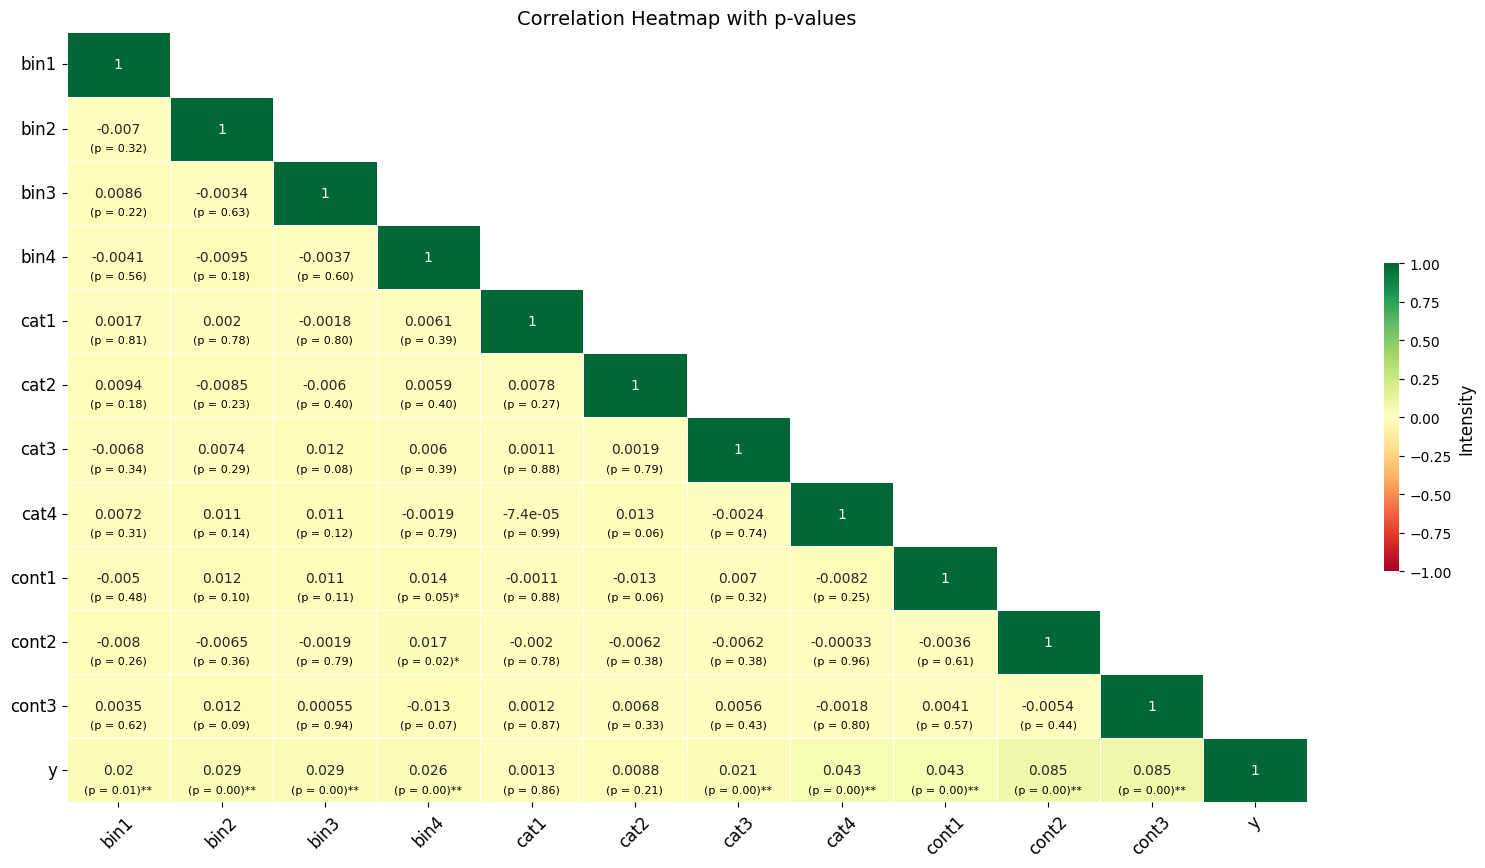

In [261]:

import textwrap
from scipy.stats import pearsonr
# from scipy.stats import spearmanr
# from scipy.stats import kendalltau

def corr_heatmap_with_pval(df, method='pearson', figsize=(10, 10), title=None):
    """
    df: dataframe to be used. Ensured the dataframe has been sliced to contain only the column you need. It accepts only numerical columns
    method: default uses the pearson method. It overall permits 3 methods; 'pearson', 'spearman' and 'kendall'
    figsize: default is (20, 10) but you can change it based on your preference
    title: Specify the title for your chart, default is None
    """
    # Make a copy of the df
    data = df.copy()
    
    # Check features correlation
    corr = data.corr(method=method)
    

    # Create a mask to hide the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set the diagonal elements of the mask to False to display self-correlation
    np.fill_diagonal(mask, False)

    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title, fontsize=14)

    # Create the heatmap with the custom mask
    heatmap = sns.heatmap(corr,
        annot=True,
        annot_kws={"fontsize": 10},  # Adjust annotation font size
        # cbar_kws={"shrink": .4, 'label': f'{method.capitalize()} Correlation', 'orientation': 'vertical'}, e set a fontesize das ticks para 8 e do label para 10
        cbar_kws={"shrink": .4, 'label': f'{method.capitalize()} Correlation', 'orientation': 'vertical'},
        linewidths=0.5,
        cmap='RdYlGn', vmin=-1, vmax=1,
        mask=mask,
        center=0,      # The center value of the legend. With divergent cmap, where white is
        # square=True,   # Force cells to be square
        ax=ax)

    # Create a function to calculate and format p-values
    p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[1]):
            x = data.iloc[:, i]
            y = data.iloc[:, j]
            mask = ~np.logical_or(np.isnan(x), np.isnan(y))
            if np.sum(mask) > 0:
                if method == 'pearson':
                    p_values[i, j] = pearsonr(x[mask], y[mask])[1]
                elif method == 'kendall':
                    p_values[i, j] = kendalltau(x[mask], y[mask])[1]
                elif method == 'spearman':
                    p_values[i, j] = spearmanr(x[mask], y[mask])[1]

    p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

    # Create a mask for the p-values heatmap
    mask_pvalues = np.triu(np.ones_like(p_values), k=1)

    # Calculate the highest and lowest correlation coefficients
    max_corr = np.max(corr.max())
    min_corr = np.min(corr.min())

    # Annotate the heatmap with p-values and change text color based on correlation value
    for i in range(p_values.shape[0]):
        for j in range(p_values.shape[1]):
            if mask_pvalues[i, j]:
                p_value = p_values.iloc[i, j]
                if not np.isnan(p_value):
                    correlation_value = corr.iloc[i, j]
                    text_color = 'white' if abs(correlation_value) >= 0.5 else 'black'
                    if p_value <= 0.01:
                        # Include double asterisks for p-value <= 0.01
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
                    elif p_value <= 0.05:
                        # Include single asterisks for p-value <= 0.05
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
                    else:
                        ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                                horizontalalignment='center',
                                verticalalignment='center',
                                fontsize=8,
                                color=text_color)
    # rotate labels
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_label('Intensity', fontsize=12)  # Tamanho da fonte do título
    colorbar.ax.tick_params(labelsize=10)  # Tamanho da fonte dos números
    # set the labels to size 10
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.grid(False)
    return fig, ax

fig, ax = corr_heatmap_with_pval(df, method='pearson', figsize=(20, 10), title='Correlation Heatmap with p-values')
plt.show()

In [262]:
def iv_woe(df, target):
    df_iv,df_woe = pd.DataFrame(), pd.DataFrame()
    data = df.copy()
    #Extract Column Names
    cols = data.columns
    def classify_iv(iv):
        if iv < 0.02:
            return 'Useless for prediction'
        elif iv < 0.1:
            return 'Weak predictor'
        elif iv < 0.3:
            return 'Medium predictor'
        elif iv < 0.5:
            return 'Strong predictor'
        else:
            return '**Strong predictor'
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        d = data.groupby(ivars, as_index=False, observed=True).agg({target: ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        df_iv=pd.concat([df_iv,temp], axis=0)
        df_iv['Classificacao'] = df_iv['IV'].apply(classify_iv)
        df_woe=pd.concat([df_woe,d], axis=0)
    return df_iv, df_woe

categorical = ['bin1', 'bin2', 'bin3', 'bin4', 'cat1', 'cat2', 'cat3', 'cat4', 'y']
df_iv, df_woe = iv_woe(df[categorical], 'y')
df_iv


,Variable,IV,Classificacao
0,bin1,0.060765,Weak predictor
0,bin2,0.132692,Medium predictor
0,bin3,0.133720,Medium predictor
0,bin4,0.107859,Medium predictor
0,cat1,0.002084,Useless for prediction
0,cat2,0.012646,Useless for prediction
0,cat3,0.093421,Weak predictor
0,cat4,0.349275,Strong predictor


In [263]:
label = 'y'
features = ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4']

x_train_bin, x_test_bin, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)
x_train_bin = sm.add_constant(x_train_bin)
x_test_bin = sm.add_constant(x_test_bin)

# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_train, x_train_bin, family=families.Binomial()).fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                16000
Model:                            GLM   Df Residuals:                    15988
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -474.79
Date:                Fri, 07 Feb 2025   Deviance:                       949.59
Time:                        20:17:40   Pearson chi2:                 2.61e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02135
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2445      0.383     -3.251      0.0

In [264]:
from sklearn.tree import DecisionTreeClassifier
class TreeBinarizer:
    def __init__(self, df, var_list, target):
        self.df = df.copy()
        self.var_list = var_list
        self.target = target
        self.binarized = {}
        self.binarize()
    
    def binarize(self, max_depth=3):
        for var in self.var_list:
            clf = DecisionTreeClassifier(max_depth=max_depth)
            clf.fit(df[var].values.reshape(-1, 1), df[self.target])
            tree_splits = clf.tree_.threshold[clf.tree_.feature != -2]
            bins = np.unique(np.array(tree_splits))
            bins = np.sort(bins)
            bins = np.insert(bins, 0, -np.inf)
            bins = np.append(bins, np.inf)
            bins = np.round(bins, 2)
            bins = np.unique(bins)
            self.binarized[var] = bins
        return self.binarized
    
    def transform(self, max_depth=3, labels: bool = False):
        self.binarize(max_depth)
        labels_dict = {}
        for var in self.var_list:
            bins = self.binarized[var]
            # cria labels com os intervalos
            labels = [f'[{bins[i]}, {bins[i+1]})' for i in range(len(bins) - 1)]
            labels_dict[var] = labels
            self.df[var] = pd.cut(self.df[var], bins=bins, labels=labels, include_lowest=True)
            self.df[var] = self.df[var].astype('category')
        if labels:
            return self.df, labels_dict
        return self.df

continuous_features = ['cont1', 'cont2', 'cont3']
df_binarized , labels_dict = TreeBinarizer(df=df, var_list=continuous_features, target='y').transform(max_depth=2)

for var in categorical:
    df_binarized[var] = df[var]
    df_binarized[var] = df_binarized[var].astype('int')
get_summary(df_binarized)

Number of rows: 20000


,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
bin1,int64,0,0.0,0,50.19,2,"[1, 0]"
bin2,int64,0,0.0,1,50.01,2,"[0, 1]"
bin3,int64,0,0.0,1,50.08,2,"[1, 0]"
bin4,int64,0,0.0,0,50.135,2,"[0, 1]"
cat1,int64,0,0.0,3,25.37,4,"[1, 2, 0, 3]"
cat2,int64,0,0.0,3,25.39,4,"[2, 3, 1, 0]"
cat3,int64,0,0.0,2,25.05,4,"[3, 0, 2, 1]"
cat4,int64,0,0.0,0,16.775,6,"[3, 2, 1, 4, 0, 5]"
cont1,category,0,0.0,"[-0.44, 1.88)",64.315,3,"[[-inf, -0.44), [-0.44, 1.88), [1.88, inf)]"
cont2,category,0,0.0,"[3.3, inf)",80.19,3,"[[-2.07, 3.3), [3.3, inf), [-inf, -2.07)]"


In [265]:
df_iv, df_woe = iv_woe(df_binarized[features+['y']], label)

df_woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,cat1,0,5040,5008,0.252038,32,0.246154,0.023624,0.000139
1,cat1,1,4949,4915,0.247358,34,0.261538,-0.055745,0.000791
2,cat1,2,4937,4904,0.246804,33,0.253846,-0.028133,0.000198
3,cat1,3,5074,5043,0.253800,31,0.238462,0.062337,0.000956
0,cat2,0,5041,5003,0.251787,38,0.292308,-0.149225,0.006047
1,cat2,1,5002,4969,0.250075,33,0.253846,-0.014966,0.000056
2,cat2,2,4879,4848,0.243986,31,0.238462,0.022902,0.000127
3,cat2,3,5078,5050,0.254152,28,0.215385,0.165507,0.006416
0,cat3,0,5006,4963,0.249774,43,0.330769,-0.280866,0.022749
1,cat3,1,4983,4942,0.248717,41,0.315385,-0.237479,0.015832


In [266]:
dict_woe = {}
for var in features:
    df_ = df_woe.query(f'Variable == "{var}"')
    woe_ = dict(zip(df_['Cutoff'], df_['WoE']))
    dict_woe[var] = woe_
# Substituir os valores da variável original pelos valores WoE
df_transform_woe = df_binarized.copy()
for var in features:
    df_transform_woe[var] = df_binarized[var].map(dict_woe[var])
df_transform_woe[label] = df_binarized[label]
df_transform_woe


,bin1,bin2,bin3,bin4,cat1,cat2,cat3,cat4,cont1,cont2,cont3,y
0,0.28035,-0.305469,0.440635,-0.279356,-0.055745,0.022902,0.264074,0.510322,-0.613995,-1.109132,1.215471,1
1,-0.21785,0.439231,-0.306883,0.389594,-0.055745,0.165507,-0.280866,0.369635,0.496880,0.738139,-1.925011,1
2,-0.21785,0.439231,-0.306883,0.389594,-0.028133,0.022902,-0.280866,-0.539582,0.496880,0.738139,1.215471,1
3,-0.21785,0.439231,-0.306883,-0.279356,-0.028133,-0.014966,-0.280866,-0.539582,-0.613995,0.738139,1.215471,1
4,0.28035,-0.305469,-0.306883,0.389594,0.023624,0.165507,0.264074,0.510322,1.377448,0.738139,-1.925011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.28035,0.439231,-0.306883,0.389594,-0.028133,-0.149225,-0.280866,0.517847,0.496880,0.738139,-1.925011,1
19996,-0.21785,0.439231,0.440635,0.389594,-0.028133,-0.149225,0.264074,0.369635,0.496880,0.738139,1.215471,1
19997,-0.21785,0.439231,-0.306883,-0.279356,-0.055745,-0.149225,-0.280866,-0.685324,0.496880,0.738139,1.215471,1
19998,-0.21785,0.439231,-0.306883,0.389594,-0.055745,-0.014966,-0.280866,0.517847,1.377448,0.738139,1.215471,1


In [267]:
x_train_bin, x_test_bin, y_train, y_test = train_test_split(df_transform_woe[features], df_transform_woe[label], test_size=0.2, random_state=42)
x_train_bin = sm.add_constant(x_train_bin)
x_test_bin = sm.add_constant(x_test_bin)
features = ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4']
# Build model and fit the data (using sklearning Logit)

logit_woe = LogisticRegression()
logit_woe.fit(x_train_bin[features], y_train)

x_train, x_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
features = ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4']
# Build model and fit the data (using sklearning Logit)

logit = LogisticRegression()
logit.fit(x_train[features], y_train)



LogisticRegression()

<center>
    <img src="roc_auc.webp" alt="Alt text" style="width:50%;"/>
</center>

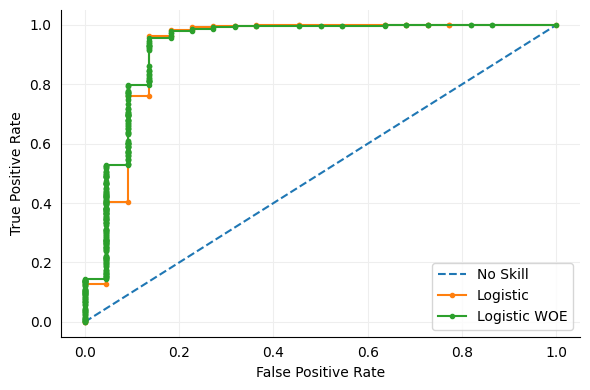

In [268]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
def calculate_roc_curves(x: pd.DataFrame, y: pd.Series, model):
    # predict probabilities
    lr_probs = model.predict_proba(x[features])
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
    return ns_fpr, ns_tpr, lr_fpr, lr_tpr


# calculate roc curves
ns_fpr, ns_tpr, lr_fpr, lr_tpr = calculate_roc_curves(x_test, y_test, logit)
# calculate roc curves logit woe
ns_fpr_woe, ns_tpr_woe, lr_fpr_woe, lr_tpr_woe = calculate_roc_curves(x_test_bin, y_test, logit_woe)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(lr_fpr_woe, lr_tpr_woe, marker='.', label='Logistic WOE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True, color='#EEEEEE')
# ax.spines['bottom'].set_color('#DDDDDD')
# ax.spines['left'].set_color('#DDDDDD')
plt.tight_layout()
plt.show()


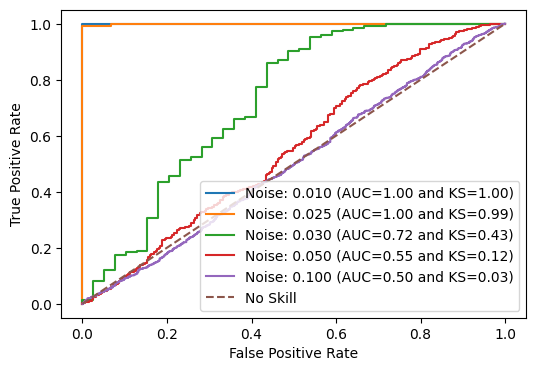

In [271]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import expit  # Sigmoid function

# Definir o número de amostras
n_samples = 20000

# 1. Simular 4 variáveis categóricas
# 3 variáveis com 4 classes (0, 1, 2, 3)
cat1 = np.random.choice([0, 1, 2, 3], size=n_samples)
cat2 = np.random.choice([0, 1, 2, 3], size=n_samples)
cat3 = np.random.choice([0, 1, 2, 3], size=n_samples)
# 1 variável com 6 classes (0, 1, 2, 3, 4, 5)
cat4 = np.random.choice([0, 1, 2, 3, 4, 5], size=n_samples)

# 4 variáveis binárias
bin1 = np.random.binomial(1, 0.5, size=n_samples)
bin2 = np.random.binomial(1, 0.5, size=n_samples)
bin3 = np.random.binomial(1, 0.5, size=n_samples)
bin4 = np.random.binomial(1, 0.5, size=n_samples)

# 2. Simular 3 variáveis contínuas
cont1 = np.random.normal(loc=0, scale=1, size=n_samples)
cont2 = np.random.normal(loc=5, scale=2, size=n_samples)
cont3 = np.random.uniform(0, 10, size=n_samples)

# 3. Codificar variáveis categóricas usando One-Hot Encoding
encoder = OneHotEncoder(drop='first')
categorical_data = encoder.fit_transform(np.column_stack((cat1, cat2, cat3, cat4)))

# 4. Simular os coeficientes para as variáveis no modelo logístico
# Inclui coeficientes para as variáveis contínuas e os dummies criados
n_features = 11 
coef = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Coeficientes
intercept = -0.5  # Intercepto

# 5. Calcular a combinação linear das variáveis explicativas
X = np.column_stack((cat1, cat2, cat3, cat4, cont1, cont2, cont3, bin1, bin2, bin3, bin4))
linear_combination = intercept + np.dot(X, coef)

df_coefs = pd.DataFrame(
    {
        'features': ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4'],
        'coef': coef
    }
)

features = ['cat1', 'cat2', 'cat3', 'cat4', 'cont1', 'cont2', 'cont3', 'bin1', 'bin2', 'bin3', 'bin4']
# 6. Aplicar a função sigmoide para gerar probabilidades
probabilities = expit(linear_combination)
results = {}
for noise in [0.01, 0.025, 0.03, 0.05, 0.1]:
    noises = np.random.normal(0, noise, size=n_samples)  # Ruído aleatório
    probabilities = probabilities + noises  # Adicionar ruído

    # 7. Gerar a variável binária dependente com base nas probabilidades se y>0.9 então 1, senão 0
    y = (probabilities > 0.9).astype(int)


    # Criar um DataFrame com as variáveis simuladas e a variável dependente
    df = pd.DataFrame({
        'bin1': bin1,
        'bin2': bin2,
        'bin3': bin3,
        'bin4': bin4,
        'cat1': cat1,
        'cat2': cat2,
        'cat3': cat3,
        'cat4': cat4,
        'cont1': cont1,
        'cont2': cont2,
        'cont3': cont3,
        'y': y
    })

    # ajustar a regressão logística
    x_train, x_test, y_train, y_test = train_test_split(df[features], df['y'], test_size=0.2, random_state=42)
    logit = LogisticRegression(max_iter=10000)
    logit.fit(x_train, y_train)
    y_pred = logit.predict_proba(x_test)[:, 1]
    results[noise] = {'y_true': y_test, 'prob': y_pred}



fig, ax = plt.subplots(figsize=(6, 4))
for noise, result in results.items():
    # Calculando a diferença máxima entre as duas curvas (KS Statistic)
    # Função de distribuição cumulativa (CDF) para as classes
    probs_classe_0_sorted = np.sort(result['prob'][result['y_true'] == 0])
    probs_classe_1_sorted = np.sort(result['prob'][result['y_true'] == 1])
    
    # CDFs
    cdf_classe_0 = np.arange(1, len(probs_classe_0_sorted) + 1) / len(probs_classe_0_sorted)
    cdf_classe_1 = np.arange(1, len(probs_classe_1_sorted) + 1) / len(probs_classe_1_sorted)
    
    # Interpolar as CDFs para garantir que ambas tenham o mesmo comprimento
    common_grid = np.linspace(min(probs_classe_0_sorted[0], probs_classe_1_sorted[0]), 
                            max(probs_classe_0_sorted[-1], probs_classe_1_sorted[-1]), 
                            num=max(len(probs_classe_0_sorted), len(probs_classe_1_sorted)))

    cdf_classe_0_interp = np.interp(common_grid, probs_classe_0_sorted, cdf_classe_0)
    cdf_classe_1_interp = np.interp(common_grid, probs_classe_1_sorted, cdf_classe_1)
    
    # Calculando a diferença máxima entre as duas curvas (KS Statistic)
    ks_statistic, p_value = ks_2samp(probs_classe_0, probs_classe_1)
    max_diff_index = np.argmax(np.abs(cdf_classe_1_interp - cdf_classe_0_interp))
    ks_value = np.abs(cdf_classe_1_interp[max_diff_index] - cdf_classe_0_interp[max_diff_index])
    
    
    fpr, tpr, _ = roc_curve(result['y_true'], result['prob'])
    auc = roc_auc_score(result['y_true'], result['prob'])
    plt.plot(fpr, tpr, label=f'Noise: {noise:.3f} (AUC={auc:.2f} and KS={ks_value:.2f})')
# no skill line
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Você explicou corretamente a essência do **Kolmogorov-Smirnov (KS)** em modelos de classificação, especialmente em contextos como o **credit scoring**. Vou detalhar isso um pouco mais, explicando como ele é aplicado em **modelos de crédito** e como podemos interpretá-lo.

### Kolmogorov-Smirnov (KS) em Modelos de Crédito:

O **KS** é uma medida de performance que avalia a capacidade de um modelo de classificação binária (como a **regressão logística**) em separar corretamente as classes **positiva** (classe 1, por exemplo, inadimplentes) e **negativa** (classe 0, por exemplo, adimplentes).

#### Como o KS Funciona em Modelos de Crédito:

1. **Previsões do Modelo**: O modelo atribui probabilidades de um evento ocorrer (por exemplo, a probabilidade de um cliente não pagar um empréstimo).

2. **Distribuição das Probabilidades**:
   - As probabilidades previstas para os exemplos da **classe 0** (ex: quem pagou o empréstimo) e da **classe 1** (ex: quem não pagou) são organizadas e plotadas em suas **funções de distribuição cumulativa (CDF)**.
   
3. **Gráfico do KS**:
   - Um **gráfico do KS** é gerado a partir das **distribuições acumuladas** (CDFs) das probabilidades previstas para as duas classes (classe 0 e classe 1).
   - O KS é então definido como a **maior diferença** entre essas duas curvas (CDF da classe 1 e CDF da classe 0).

#### O que o KS Mede:
- O KS mede o **grau de separação** entre as duas classes. Quanto maior a diferença entre as duas curvas cumulativas, melhor o modelo está separando as classes.

#### Fórmula do KS:
$$
\text{KS} = \max |F_1(p) - F_0(p)|
$$
Onde:
- $F_1(p)$ é a função de distribuição acumulativa para a **classe 1**.
- $F_0(p)$ é a função de distribuição acumulativa para a **classe 0**.
- $p$ é a probabilidade prevista pelo modelo.

A **estatística KS** é o valor máximo da diferença entre essas duas CDFs.



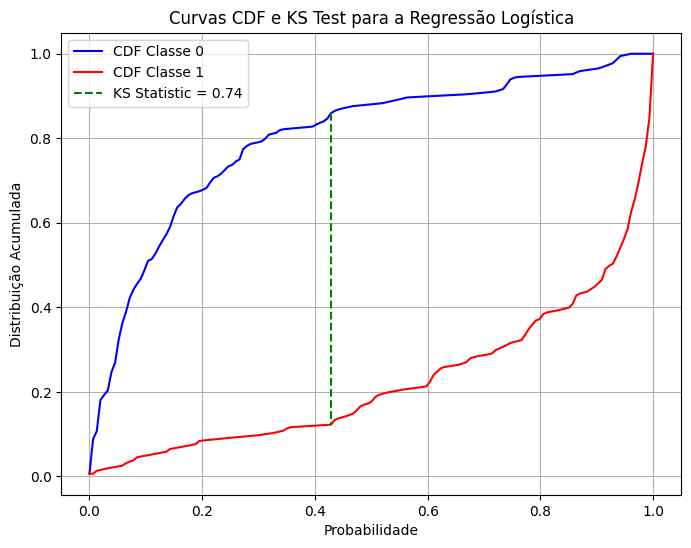

Estatística KS: 0.739488320355951
p-value: 2.2362988933747712e-40


In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp, kstest

# Gerar um conjunto de dados de classificação binária
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Obter as probabilidades preditas para a classe 1
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1

# Separar as probabilidades preditas para a classe 0 e 1
probs_classe_0 = y_pred_proba[y_test == 0]
probs_classe_1 = y_pred_proba[y_test == 1]

# Função de distribuição cumulativa (CDF) para as classes
probs_classe_0_sorted = np.sort(probs_classe_0)
probs_classe_1_sorted = np.sort(probs_classe_1)

# CDFs
cdf_classe_0 = np.arange(1, len(probs_classe_0_sorted) + 1) / len(probs_classe_0_sorted)
cdf_classe_1 = np.arange(1, len(probs_classe_1_sorted) + 1) / len(probs_classe_1_sorted)

# Interpolar as CDFs para garantir que ambas tenham o mesmo comprimento
common_grid = np.linspace(min(probs_classe_0_sorted[0], probs_classe_1_sorted[0]), 
                          max(probs_classe_0_sorted[-1], probs_classe_1_sorted[-1]), 
                          num=max(len(probs_classe_0_sorted), len(probs_classe_1_sorted)))

cdf_classe_0_interp = np.interp(common_grid, probs_classe_0_sorted, cdf_classe_0)
cdf_classe_1_interp = np.interp(common_grid, probs_classe_1_sorted, cdf_classe_1)

# Plotando o gráfico KS
# Criar a figura e os eixos com o padrão `fig, ax`
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar as CDFs para as duas classes
ax.plot(common_grid, cdf_classe_0_interp, label='CDF Classe 0', color='blue')
ax.plot(common_grid, cdf_classe_1_interp, label='CDF Classe 1', color='red')

# Configurar o título e os rótulos dos eixos
ax.set_title('Curvas CDF e KS Test para a Regressão Logística')
ax.set_xlabel('Probabilidade')
ax.set_ylabel('Distribuição Acumulada')

# Ativar grid
ax.grid(True)

# Calcular a estatística KS e a diferença máxima
ks_statistic, p_value = ks_2samp(probs_classe_0, probs_classe_1)
max_diff_index = np.argmax(np.abs(cdf_classe_1_interp - cdf_classe_0_interp))
ks_value = np.abs(cdf_classe_1_interp[max_diff_index] - cdf_classe_0_interp[max_diff_index])

# Adicionar a linha de diferença máxima (KS) no gráfico
ax.vlines(common_grid[max_diff_index], cdf_classe_0_interp[max_diff_index], cdf_classe_1_interp[max_diff_index],
           color='green', label=f'KS Statistic = {ks_value:.2f}', linestyles='dashed')

# Exibir a legenda
ax.legend()

# Mostrar o gráfico
plt.show()

# Exibir a estatística KS
print(f"Estatística KS: {ks_statistic}")
print(f"p-value: {p_value}")

In [273]:
ks_test = kstest(probs_classe_0, probs_classe_1)
ks_test

KstestResult(statistic=np.float64(0.739488320355951), pvalue=np.float64(2.2362988933747712e-40), statistic_location=np.float64(0.43016993527935216), statistic_sign=np.int8(1))

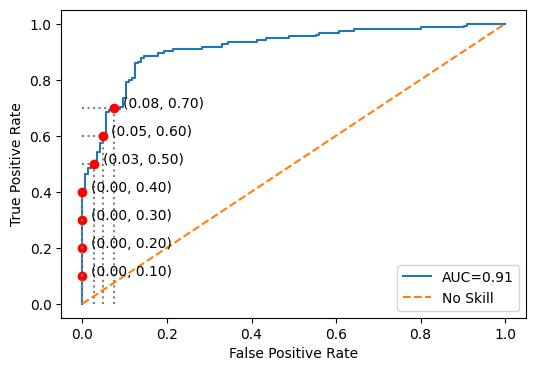

In [274]:

fig, ax = plt.subplots(figsize=(6, 4))

    
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC={auc:.2f}')
# adicionar a marcação dos pontos 10, 20, 30, 40, 50, 60, 70% de True Positive Rate. adicionar o valor do ponto

# Posições de TPR que queremos marcar
marcacoes_tpr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Para cada TPR, encontrar o ponto correspondente na curva
for tpr_value in marcacoes_tpr:
    # Encontrar o ponto mais próximo da TPR desejada
    closest_index = np.argmin(np.abs(tpr - tpr_value))
    fpr_value = fpr[closest_index]
    
    # Adicionar linhas pontilhadas
    ax.plot([fpr_value, fpr_value], [0, tpr_value], linestyle=':', color='gray')  # linha vertical
    ax.plot([0, fpr_value], [tpr_value, tpr_value], linestyle=':', color='gray')  # linha horizontal
    
    # Plotar o ponto com marcador
    ax.plot(fpr_value, tpr_value, 'ro')  # ponto marcado em vermelho
    
    # Adicionar o texto com as coordenadas ao lado do ponto
    ax.text(fpr_value + 0.02, tpr_value, f'({fpr_value:.2f}, {tpr_value:.2f})', fontsize=10, color='black')

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()